In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

df = pd.read_csv('D:\python practice/Data Analytics/Real Dataset Practice/Spotify customers/spotify-2023.csv',encoding='latin1')

In [22]:
df_t = df.copy()

In [23]:
df_t['artist(s)_name'] = df_t['artist(s)_name'].str.split(',')

In [25]:
df_t = df_t.explode('artist(s)_name')
df_t.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,Dave,2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
5,Sprinter,Central Cee,2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,Eslabon Armado,2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
6,Ella Baila Sola,Peso Pluma,2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3


In [26]:
top_artist = df_t['artist(s)_name'].value_counts().reset_index()
top_artist.columns = ['Artist','number of tracks']

In [27]:
col_interest = [
    'artist(s)_name',
    'artist_count',
    'in_spotify_playlists',
    'in_apple_playlists'
]

In [28]:
artist_stats = df_t.groupby('artist(s)_name').agg({
    'track_name' : 'count',
    'in_spotify_playlists' : 'sum',
    'in_apple_playlists':'sum'
}).reset_index()

artist_stats.columns = ['Artist', 'Number of Tracks', 'Spotify Playlists', 'Apple Playlists']

In [29]:
top_by_playlist = artist_stats.sort_values(by='Spotify Playlists', ascending=False).head(10)

In [31]:
melted = top_by_playlist.melt(
    id_vars='Artist', 
    value_vars=['Spotify Playlists', 'Apple Playlists'], 
    var_name='Platform', 
    value_name='Playlist Count')

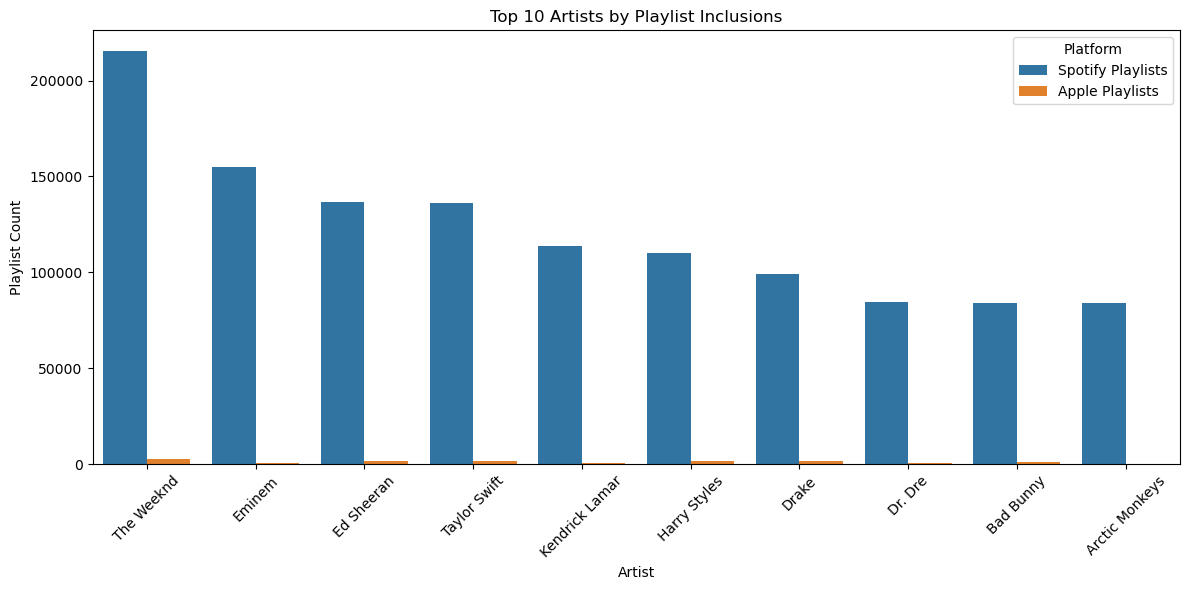

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Artist', y='Playlist Count', hue='Platform')
plt.title("Top 10 Artists by Playlist Inclusions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()